In [1]:
!pip install haversine
!pip install shapely
!pip install geopandas
!pip install geojson
!pip install folium
!pip install tqdm

You should consider upgrading via the 'C:\Users\Jiord\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


     ---------------------------------------- 1.4/1.4 MB 6.2 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\Jiord\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


     ---------------------------------------- 1.1/1.1 MB 6.6 MB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 12.4 MB/s eta 0:00:00
     ---------------------------------------- 21.9/21.9 MB 5.9 MB/s eta 0:00:00
     ---------------------------------------- 60.0/60.0 KB ? eta 0:00:00
  Using cached click-8.1.3-py3-none-any.whl (96 kB)


You should consider upgrading via the 'C:\Users\Jiord\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Jiord\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Jiord\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



     -------------------------------------- 102.3/102.3 KB 2.0 MB/s eta 0:00:00
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)


You should consider upgrading via the 'C:\Users\Jiord\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
import requests
import random
import pandas as pd 
from tqdm import tqdm
from cred_her import YOUR_API_KEY
import json 

import ast

# Tools

import folium
from shapely.geometry import Polygon
import numpy as np
import geojson
import folium
import matplotlib.pyplot as plt
import geopandas as gpd
from tqdm import tqdm
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import shapely.wkt
from haversine import haversine, Unit
import random
import time
from pyproj import Geod

from shapely import wkt
from geopandas import datasets, GeoDataFrame, read_file, points_from_xy
from geopandas.tools import overlay
from geopandas.tools import sjoin

from folium.plugins import MeasureControl
from folium.plugins import MarkerCluster

from tqdm import tqdm
import json

import requests
import random
import time 

In [4]:
df_map = pd.read_csv('DATASET_FINAL.csv')

In [5]:
df_map.head(2)

,departamentocodigo,Departamento,municipiocodigo,Municipio,Nombre_comercial,bandera,Direccion,producto,precio,estado,fecharegistro,periodo,mes,Dir2,Full_Address,Coords
0,11,BOGOTA D.C.,11001,BOGOTA D.C.,ESTACION DE SERVICIO METROPOLITANA,MOBIL,CARRERA 120 No. 17-37,BIODIESEL EXTRA,8400,1,2018-05-02,2018,5,CARRERA 120 No. 17-37,"CARRERA 120 No. 17-37, Bogota d.c., Colombia","(4.68585, -74.15736)"
1,11,BOGOTA D.C.,11001,BOGOTA D.C.,ESTACION DE SERVICIO METROPOLITANA,MOBIL,CARRERA 120 No. 17-37,GASOLINA CORRIENTE OXIGENADA,9095,1,2018-05-02,2018,5,CARRERA 120 No. 17-37,"CARRERA 120 No. 17-37, Bogota d.c., Colombia","(4.68585, -74.15736)"


In [6]:
df_map = df_map.rename(columns={"bandera": "Bandera", "producto": "Producto"})

In [7]:
df_map = df_map.drop_duplicates(subset=['Nombre_comercial','Bandera','Producto'])

In [8]:
len(df_map)

1813

In [9]:
df_map['Coords'].value_counts()

('NA', 'NA')            69
(4.68947, -74.06588)     8
(7.97831, -75.19036)     6
(1.3461, -75.04915)      6
(4.58199, -74.10092)     6
                        ..
(6.32746, -75.56008)     1
(6.27469, -75.5754)      1
(6.28017, -75.57449)     1
(2.94372, -75.24155)     1
(4.59945, -74.11045)     1
Name: Coords, Length: 547, dtype: int64

In [10]:
df_map[df_map['Coords']=="('NA', 'NA')"]['Direccion'].unique()

array(['Calle 47 No. 65-10', 'CARRERA 50 No. 44B-15',
       'Avenida Carrera 30 # 2 - 38', 'DIAGONAL 51 # 35 - 120',
       'CALLE 60 # 56A -37', 'K1 Glorieta Aeropuerto',
       'GLORIETA JMC 0.2 KIM VIA GUARNE', 'Diagonal 43 No.45-275',
       'Carrera 7 # 84 - 91', 'Calle 13 # 38 - 25', 'Carrera 48 No.52-02',
       'Calle 19 # 33 - 68', 'Avenida 19 # 127C - 50', 'CRA 17 # 50-42',
       'CALLE 80 # 24-30', 'Carrera 65 # 30 - 40',
       'Carrera 47 Calle 64A-125', 'cra70#44-23',
       'K 8 VIA LLANOGRANDE RIONEGRO', 'CARRERA 39A No. 62-30',
       'CALLE 38 NO 55 A-85', 'Carrera 73 # 36A - 55 Sur'], dtype=object)

In [11]:
df_map.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1813 entries, 0 to 1812
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   departamentocodigo  1813 non-null   int64 
 1   Departamento        1813 non-null   object
 2   municipiocodigo     1813 non-null   int64 
 3   Municipio           1813 non-null   object
 4   Nombre_comercial    1813 non-null   object
 5   Bandera             1813 non-null   object
 6   Direccion           1813 non-null   object
 7   Producto            1813 non-null   object
 8   precio              1813 non-null   int64 
 9   estado              1813 non-null   int64 
 10  fecharegistro       1813 non-null   object
 11  periodo             1813 non-null   int64 
 12  mes                 1813 non-null   int64 
 13  Dir2                1813 non-null   object
 14  Full_Address        1813 non-null   object
 15  Coords              1813 non-null   object
dtypes: int64(6), object(10)


In [12]:
df_map['Coords'][0]

'(4.68585, -74.15736)'

In [13]:
float(df_map['Coords'][0].replace('(','').replace(')','').split(',')[0]) # Lat

4.68585

In [14]:
float(df_map['Coords'][0].replace('(','').replace(')','').split(',')[1].strip()) # Longitud

-74.15736

In [15]:
df_map['LAT'] = df_map['Coords'].apply(lambda x : float(x.replace('(','').replace(')','').split(',')[0]) if x !=  "('NA', 'NA')"  else 'Empty')
df_map['LNG'] = df_map['Coords'].apply(lambda x : float(x.replace('(','').replace(')','').split(',')[1]) if x !=  "('NA', 'NA')"  else 'Empty')

In [16]:
df_map['LAT'].value_counts()

Empty      69
4.5894      8
4.59201     8
4.68947     8
4.59663     7
           ..
2.94372     1
6.28006     1
4.67605     1
6.28017     1
4.59945     1
Name: LAT, Length: 538, dtype: int64

In [17]:
df_map['LNG'].value_counts()

Empty        69
-74.06588     8
-74.08027     8
-74.09301     7
-74.10592     7
             ..
-75.5754      1
-75.57449     1
-75.24155     1
-75.60131     1
-74.11045     1
Name: LNG, Length: 541, dtype: int64

# Funciones a usar 

In [18]:
def GetLatLon2(Address,YOUR_API_KEY): 

    url2_geocode  = f'https://geocode.search.hereapi.com/v1/geocode?q={Address}&apiKey='+YOUR_API_KEY
    
    try:
        response = requests.get(url2_geocode).json()
        CleanAddress = response['items'][0]['title'].upper()
        LAT = response['items'][0]['position']['lat']
        LON = response['items'][0]['position']['lng']
        results = [CleanAddress,round(LAT,7),round(LON,7)]
    except:
        results = ['NotFound','NA','NA']
    return results

def GetLatLon2_google(Address,YOUR_API_KEY): 

    api_url = f'https://maps.googleapis.com/maps/api/geocode/json?address={Address}&key={YOUR_API_KEY}'
    try:
        j = requests.get(api_url).json()
        CleanAddress = str(j['results'][0]['formatted_address']).upper()
        LAT = j['results'][0]['geometry']['location']['lat']
        LON = j['results'][0]['geometry']['location']['lng']
        results = [CleanAddress,round(LAT,7),round(LON,7)]
    except:
        results = ['NotFound','NA','NA']
    return results,j 


def cal_dist(geo_source,point2,unit):
    
    
    if unit == 'Km':
        distance = haversine(geo_source, point2,Unit.KILOMETERS)
    elif unit == 'm':
        distance = haversine(geo_source, point2,Unit.METERS)
    elif unit == 'miles':
        distance = haversine(geo_source, point2,Unit.MILES)
    
    return round(distance,2)


def distance_estac(geo_source,df,radio,unit):
    
    
    distancia = []
    source = []


    for i in tqdm(range(len(df)),colour = 'green'):
        distancia.append(cal_dist(geo_source,df['POINT'][i],unit))
        source.append(geo_source)

    new_df = df.copy()
    new_df['SOURCE'] = source
    new_df['DISTANCE'] = distancia
    new_df = new_df[new_df['DISTANCE']<=radio]
    new_df = new_df.reset_index()
    new_df = new_df.drop(columns ='index')
    return new_df.sort_values(by='DISTANCE',ascending=True)

def transform_df_map(df):
    

    coordenadas = []

    for i in range(len(df)):
        
        try :
            
            coord = float(df['LAT'][i]),float(df['LNG'][i])
            coordenadas.append(coord)

        except :
            
            coordenadas.append('EMPTY')
            
    df['POINT'] = coordenadas
    df = df[df['POINT']!='EMPTY']
    df = df.reset_index()
    df = df.drop(columns = 'index')
    new_df = df.copy()
    
    return new_df

# Paso a Paso de la App

1. Filtrar la ciudad
2. Ingresar la central location
3. Configurar el radio y la unidad de medida
4. Calcular la distancia


# Filtrar ciudad

In [19]:
cities = list(df_map['Municipio'].unique())
cities

['BOGOTA D.C.',
 'MEDELLIN',
 'ENVIGADO',
 'CANON DE RIO CLARO',
 'ITAGUI',
 'CAUCASIA',
 'BELLO']

In [30]:
df_city = df_map[df_map['Municipio']==cities[0]]
df_city.reset_index(inplace =  True)
df_city.drop(columns= 'index' , inplace = True)

C:\Users\Jiord\AppData\Local\Temp\ipykernel_14512\291911198.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city.drop(columns= 'index' , inplace = True)


In [31]:
df_city.head(2)

,departamentocodigo,Departamento,municipiocodigo,Municipio,Nombre_comercial,Bandera,Direccion,Producto,precio,estado,fecharegistro,periodo,mes,Dir2,Full_Address,Coords,LAT,LNG
0,11,BOGOTA D.C.,11001,BOGOTA D.C.,ESTACION DE SERVICIO METROPOLITANA,MOBIL,CARRERA 120 No. 17-37,BIODIESEL EXTRA,8400,1,2018-05-02,2018,5,CARRERA 120 No. 17-37,"CARRERA 120 No. 17-37, Bogota d.c., Colombia","(4.68585, -74.15736)",4.68585,-74.15736
1,11,BOGOTA D.C.,11001,BOGOTA D.C.,ESTACION DE SERVICIO METROPOLITANA,MOBIL,CARRERA 120 No. 17-37,GASOLINA CORRIENTE OXIGENADA,9095,1,2018-05-02,2018,5,CARRERA 120 No. 17-37,"CARRERA 120 No. 17-37, Bogota d.c., Colombia","(4.68585, -74.15736)",4.68585,-74.15736


In [32]:
central_location = 'CC Multiplaza , Bogotá'
central_location = central_location.replace('#','No')
R = GetLatLon2(central_location,YOUR_API_KEY)

In [33]:
geo_source = R[1],R[2]
geo_source

(4.65226, -74.12695)

In [34]:
radio = 1
unit = 'Km'

In [35]:
df_city =  transform_df_map(df_city)
df_city.head(2)

C:\Users\Jiord\AppData\Local\Temp\ipykernel_14512\2018751417.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['POINT'] = coordenadas


,departamentocodigo,Departamento,municipiocodigo,Municipio,Nombre_comercial,Bandera,Direccion,Producto,precio,estado,fecharegistro,periodo,mes,Dir2,Full_Address,Coords,LAT,LNG,POINT
0,11,BOGOTA D.C.,11001,BOGOTA D.C.,ESTACION DE SERVICIO METROPOLITANA,MOBIL,CARRERA 120 No. 17-37,BIODIESEL EXTRA,8400,1,2018-05-02,2018,5,CARRERA 120 No. 17-37,"CARRERA 120 No. 17-37, Bogota d.c., Colombia","(4.68585, -74.15736)",4.68585,-74.15736,"(4.68585, -74.15736)"
1,11,BOGOTA D.C.,11001,BOGOTA D.C.,ESTACION DE SERVICIO METROPOLITANA,MOBIL,CARRERA 120 No. 17-37,GASOLINA CORRIENTE OXIGENADA,9095,1,2018-05-02,2018,5,CARRERA 120 No. 17-37,"CARRERA 120 No. 17-37, Bogota d.c., Colombia","(4.68585, -74.15736)",4.68585,-74.15736,"(4.68585, -74.15736)"


In [36]:
df_city['POINT'][0]

(4.68585, -74.15736)

In [37]:
results = distance_estac(geo_source,df_city,radio,unit)
results.reset_index(inplace =  True)
results.drop(columns= 'index' , inplace = True)

100%|██████████| 1246/1246 [00:00<00:00, 59102.10it/s]


In [38]:
results['Nombre_comercial'].unique()

array(['EDS ESSO INDUSTRIAL BOYACA',
       'ESTACION DE SERVICIO MILENIUM GAS CALLE 13',
       'ESTACION DE SERVICIO FERROCARRIL', 'EDS CALLE 13',
       'ESTACION DE SERVICIO TERPEL VILLA ALZACIA',
       'ESTACION DE SERVICIO VILLA ALSACIA'], dtype=object)

In [39]:
results['Producto'].unique()

array(['GASOLINA CORRIENTE OXIGENADA', 'BIODIESEL EXTRA', 'BIOACEM AL 9%',
       'GASOLINA EXTRA OXIGENADA'], dtype=object)

In [40]:
type(results)

pandas.core.frame.DataFrame

In [41]:
gdf_results = GeoDataFrame(results,
                          geometry =  points_from_xy(results.LNG,results.LAT))

In [42]:
type(gdf_results)

geopandas.geodataframe.GeoDataFrame

In [43]:
gdf_results.head(2)

,departamentocodigo,Departamento,municipiocodigo,Municipio,Nombre_comercial,Bandera,Direccion,Producto,precio,estado,...,mes,Dir2,Full_Address,Coords,LAT,LNG,POINT,SOURCE,DISTANCE,geometry
0,11,BOGOTA D.C.,11001,BOGOTA D.C.,EDS ESSO INDUSTRIAL BOYACA,MOBIL,CARRERA 71 No. 19-05,GASOLINA CORRIENTE OXIGENADA,9090,1,...,5,CARRERA 71 No. 19-05,"CARRERA 71 No. 19-05, Bogota d.c., Colombia","(4.65127, -74.1234)",4.65127,-74.1234,"(4.65127, -74.1234)","(4.65226, -74.12695)",0.41,POINT (-74.12340 4.65127)
1,11,BOGOTA D.C.,11001,BOGOTA D.C.,EDS ESSO INDUSTRIAL BOYACA,MOBIL,CARRERA 71 No. 19-05,BIODIESEL EXTRA,9190,1,...,5,CARRERA 71 No. 19-05,"CARRERA 71 No. 19-05, Bogota d.c., Colombia","(4.65127, -74.1234)",4.65127,-74.1234,"(4.65127, -74.1234)","(4.65226, -74.12695)",0.41,POINT (-74.12340 4.65127)


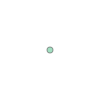

In [44]:
gdf_results['geometry'][0]

In [45]:
oil = list(gdf_results['Producto'].unique())
oil

['GASOLINA CORRIENTE OXIGENADA',
 'BIODIESEL EXTRA',
 'BIOACEM AL 9%',
 'GASOLINA EXTRA OXIGENADA']

In [46]:
gdf_results_2 = gdf_results[gdf_results['Producto']==oil[1]]
gdf_results_2.reset_index(inplace =  True)
gdf_results_2.drop(columns= 'index' , inplace = True)

C:\Users\Jiord\AppData\Local\Temp\ipykernel_14512\3804081380.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_results_2.drop(columns= 'index' , inplace = True)


In [47]:
gdf_results_2.columns

Index(['departamentocodigo', 'Departamento', 'municipiocodigo', 'Municipio',
       'Nombre_comercial', 'Bandera', 'Direccion', 'Producto', 'precio',
       'estado', 'fecharegistro', 'periodo', 'mes', 'Dir2', 'Full_Address',
       'Coords', 'LAT', 'LNG', 'POINT', 'SOURCE', 'DISTANCE', 'geometry'],
      dtype='object')

In [51]:
gdf_results_2 = gdf_results_2.rename(columns={"precio": "Precio"})

In [52]:
gdf_results_2['Precio'].min()

8000

In [53]:
gdf_results_2['Precio'].max()

9190

In [54]:
def marker_rest(df,mapa,unit,oil,icono):
    
    df = df[df['Producto']==oil]
    df = df.reset_index()
    df = df.drop(columns = 'index')
    
    for i in range(len(df)):
        
        if df['Precio'][i]==df['Precio'].min():
        
            html =  f"""<b>MARCA:</b> {df.Bandera[i]} <br>
                    <b>NAME:</b> {df.Nombre_comercial[i]} <br>
                    <b>PRODUCTO:</b> {df.Producto[i]} <br>
                    <b>PRECIO:</b> {df.Precio[i]} <br>
                    <b>DISTANCE:</b> {round(df.DISTANCE[i],2)}<br>
                    <b>DIRECCION:</b> {df.Direccion[i]}<br>
                    <b>UNIT:</b> {unit}<br>"""
            iframe = folium.IFrame(html,figsize=(6, 3))
            popup = folium.Popup(iframe)
            



            folium.Marker(location=[float(df['LAT'][i]),float(df['LNG'][i])],
                               icon=folium.Icon(color='darkgreen', icon_color='white',
                               icon=icono, prefix='glyphicon'),
                               popup = popup).add_to(mapa)
        
        elif df['Precio'][i]==df['Precio'].max():
        
            html =  f"""<b>MARCA:</b> {df.Bandera[i]} <br>
                    <b>NAME:</b> {df.Nombre_comercial[i]} <br>
                    <b>PRODUCTO:</b> {df.Producto[i]} <br>
                    <b>PRECIO:</b> {df.Precio[i]} <br>
                    <b>DISTANCE:</b> {round(df.DISTANCE[i],2)}<br>
                    <b>DIRECCION:</b> {df.Direccion[i]}<br>
                    <b>UNIT:</b> {unit}<br>"""
            iframe = folium.IFrame(html,figsize=(6, 3))
            popup = folium.Popup(iframe)



            folium.Marker(location=[float(df['LAT'][i]),float(df['LNG'][i])],
                               icon=folium.Icon(color='darkred', icon_color='white',
                               icon=icono, prefix='glyphicon'),
                               popup =popup).add_to(mapa)
        else :
            html =  f"""<b>MARCA:</b> {df.Bandera[i]} <br>
                    <b>NAME:</b> {df.Nombre_comercial[i]} <br>
                    <b>PRODUCTO:</b> {df.Producto[i]} <br>
                    <b>PRECIO:</b> {df.Precio[i]} <br>
                    <b>DISTANCE:</b> {round(df.DISTANCE[i],2)}<br>
                    <b>DIRECCION:</b> {df.Direccion[i]}<br>
                    <b>UNIT:</b> {unit}<br>"""
            iframe = folium.IFrame(html,figsize=(6, 3))
            popup = folium.Popup(iframe)



            folium.Marker(location=[float(df['LAT'][i]),float(df['LNG'][i])],
                               icon=folium.Icon(color='orange', icon_color='white',
                               icon=icono, prefix='glyphicon'),
                               popup =popup).add_to(mapa)
                           
    return

# Show Map

In [55]:
m = folium.Map([geo_source[0],geo_source[1]], zoom_start= 15)

folium.Circle(
    
    radius = int(radio)*1000,
    location = [geo_source[0],geo_source[1]],
    color = 'green',
    fill = 'green'

).add_to(m)

folium.Marker(

            location = [geo_source[0],geo_source[1]],
            icon =  folium.Icon(color='black',icon_color='white',
            icon = "home",prefix = 'glyphicon'),
            popup = "<b>Centroid</b>").add_to(m)

marker_rest(gdf_results_2,m,unit,oil[1],'usd')

m